<a href="https://colab.research.google.com/github/KieranJP/Linear-Regression-Practice/blob/master/Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

In [3]:
#Using collab to create an ML Project - Kieran Power
#Plan is to use a simple Supervised(labeled) Linear classifier
#Collect Data -> Pick the model -> Train the model -> Test the model
#Use pattern recognition to decifer good/bad code against:
#Program Length, Lines of comments, Number of blank Lines, Good/Bad


#Uploading Test Data - Uncommented on first run then not needed after
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


#Linear Regression Practice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#Selecting the Csv to use then Displaying it, may have to change the (3) when first ran
df = pd.read_csv("EditedTestData.csv")
df

Saving EditedTestData.csv to EditedTestData.csv
User uploaded file "EditedTestData.csv" with length 7149 bytes


,NumOfLines,NumOfComments,NumOfBlank,Classification
0,24,0,6,False
1,20,0,3,False
2,24,0,3,False
3,24,0,3,False
4,7,0,1,False
5,12,0,7,False
6,25,16,13,False
7,46,35,22,False
8,34,28,16,False
9,10,4,4,False


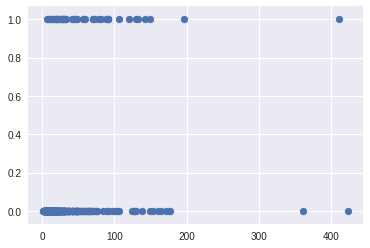

In [18]:
#Plotting Scatter Graph
%matplotlib inline
#Plotting Number of Lines vs Classification
plt.scatter(df['NumOfLines'],df['Classification'])

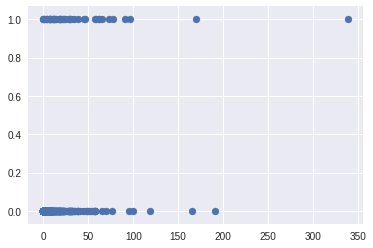

In [16]:
#Plotting Number of Comments vs Classification
plt.scatter(df['NumOfComments'],df['Classification'])

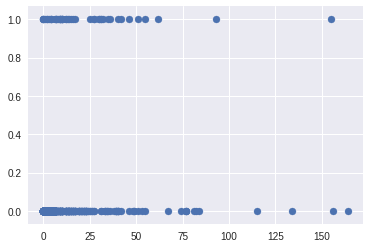

In [17]:
#Plotting Number of Blank Lines vs Classification
plt.scatter(df['NumOfBlank'],df['Classification'])

In [5]:
#Seperating the data into two sections, training and testing
X = df[['NumOfLines','NumOfComments','NumOfBlank']]
y = df['Classification']
#Split with a weighing of 70-30(0.3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
#Shows the Training data selected for this run, should change each time
X_train

,NumOfLines,NumOfComments,NumOfBlank
107,10,0,0
185,16,3,4
141,13,6,5
206,5,1,2
36,32,44,42
143,14,0,4
320,7,0,0
228,7,2,2
252,29,6,18
354,10,2,20


In [6]:
#Shows the testing Data for this run, again should be random each time
X_test

,NumOfLines,NumOfComments,NumOfBlank
419,22,0,5
137,149,65,10
116,154,119,26
53,8,6,7
176,31,4,1
487,20,19,8
480,74,28,31
78,31,15,19
347,7,1,3
417,22,0,0


In [7]:
#Shows the trainging Data for this run, again should be random each time
y_train

107    False
185    False
141    False
206    False
36     False
143    False
320    False
228    False
252    False
354    False
200    False
193    False
65     False
85     False
448     True
119    False
229    False
105    False
319    False
47     False
330    False
438    False
194    False
15     False
62     False
3      False
422    False
225    False
138    False
57     False
       ...  
420    False
391    False
349    False
407    False
73     False
412    False
370    False
75     False
442    False
477     True
231    False
215    False
207    False
249    False
364    False
435    False
418    False
20     False
210    False
329    False
459     True
444    False
41     False
278    False
300    False
94     False
151    False
68     False
388    False
408    False
Name: Classification, Length: 347, dtype: bool

In [8]:
#Shows the testing Data for this run, again should be random each time
y_test

419    False
137    False
116    False
53     False
176    False
487     True
480     True
78     False
347    False
417    False
172    False
196    False
315    False
129    False
34     False
227    False
318    False
268    False
199    False
495     True
52     False
321    False
117    False
167    False
187    False
186    False
189    False
71     False
224    False
297    False
       ...  
204    False
291    False
482     True
261    False
254    False
362    False
12     False
30     False
339    False
331    False
131    False
483     True
446    False
22     False
478     True
473     True
336    False
115    False
458     True
449     True
160    False
283    False
253    False
462     True
120    False
181    False
178    False
441    False
453     True
201    False
Name: Classification, Length: 149, dtype: bool

In [9]:
#Running the Regression Model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#Run the test again so that we can compare the prediction later
X_test

,NumOfLines,NumOfComments,NumOfBlank
419,22,0,5
137,149,65,10
116,154,119,26
53,8,6,7
176,31,4,1
487,20,19,8
480,74,28,31
78,31,15,19
347,7,1,3
417,22,0,0


In [11]:
#Run our Prediction of what the X_test should look like
clf.predict(X_test)

array([ 0.05496882,  0.31288845,  0.47433196,  0.06731215,  0.07720128,
        0.11402704,  0.13226181,  0.08942549,  0.05563557,  0.0618519 ,
        0.10129956,  0.05647831,  0.05676484,  0.05603812,  0.11801699,
        0.06037612,  0.05708901,  0.0519851 ,  0.10985645,  0.08757962,
        0.11159798,  0.05737555,  0.23856597,  0.12611866,  0.08501221,
        0.13297532,  0.05903869,  0.06906672,  0.06037612,  0.09137517,
        0.10645642,  0.05523302,  0.05603812,  0.0769861 ,  0.48357046,
        0.05550662,  0.05603812,  0.06738279,  0.0571282 ,  0.07085207,
        0.08549159,  0.0571282 ,  0.04972656,  0.05793175,  0.056973  ,
        0.08816799,  0.34219727,  0.06760416,  0.07381501,  0.07028603,
        0.06941549,  0.0924668 , -0.04628091,  0.12735538,  0.09539055,
        0.07599518,  0.05899951,  0.05334724,  0.05081819,  0.07176462,
        0.05833121,  0.0553114 ,  0.06939863,  0.18265021,  0.0553114 ,
        0.06314521,  0.05554188,  0.05640148,  0.07224555,  0.09

In [12]:
y_test

419    False
137    False
116    False
53     False
176    False
487     True
480     True
78     False
347    False
417    False
172    False
196    False
315    False
129    False
34     False
227    False
318    False
268    False
199    False
495     True
52     False
321    False
117    False
167    False
187    False
186    False
189    False
71     False
224    False
297    False
       ...  
204    False
291    False
482     True
261    False
254    False
362    False
12     False
30     False
339    False
331    False
131    False
483     True
446    False
22     False
478     True
473     True
336    False
115    False
458     True
449     True
160    False
283    False
253    False
462     True
120    False
181    False
178    False
441    False
453     True
201    False
Name: Classification, Length: 149, dtype: bool

In [0]:
#clf.predict(y_test)

In [14]:
#Our accuracy percentage
clf.score(X_test, y_test)

0.13890426603574468

Not great accuracy-wise, need to use a different model due to there not being a linear correlation between my values and the classification.

In [0]:
#Random state arguement would be the way you could make sure that the data you are testing and training is the same each time
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
#X_test

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

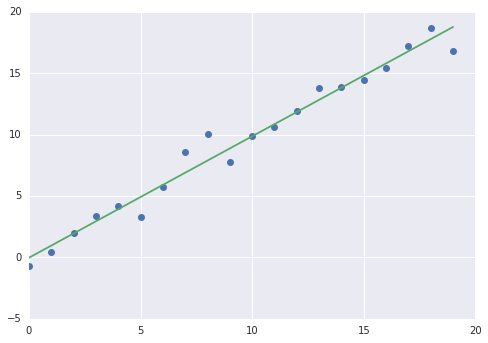

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

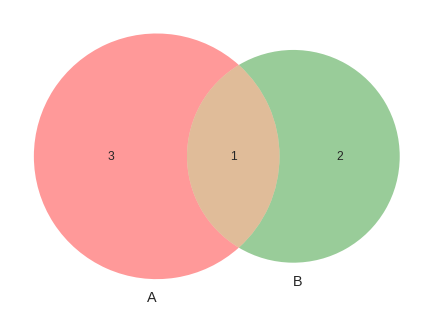

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).